accuracy:  0.9933333333333333
[291.4551238555538, 128.4041952367294, 97.23224098852059, 84.0709996662195, 76.43781188222562, 71.04868738543178, 70.62450049383085, 66.67868722925635, 62.426969028438776, 59.9925956785803]


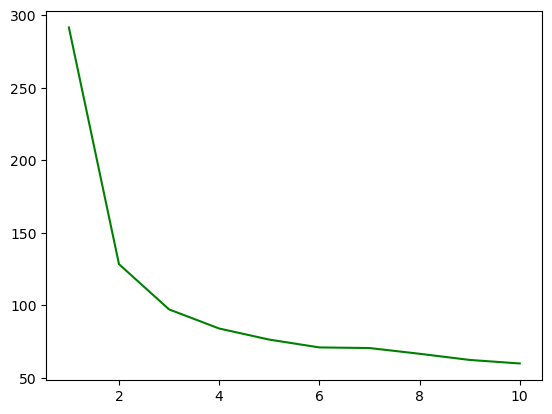

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

#euclidean distance between two data data points
#let two points x1 and x2 of n-dimensions
#d=square_root_of(Sum_of(square_of(x1[i]-x2[i])))
#n_dim means the number of dimensions
def distance(data_point1,data_point2,n_dim):
    sum_of_square=0
    for i in range(0,n_dim):
        sum_of_square+=((data_point1[i]-data_point2[i])**2)
    sq_root=math.sqrt(sum_of_square)
    return sq_root

#creates k clusters
#initialises clusters to k equally distributed points
#random initialisation can also be applied
#sh means shape and k number of clusters
def cluster_initialiser(data_set,sh,k):
    rows=sh[0]
    colm=sh[1]
    last_index=int(rows/(k+1))
    interval=int(rows/(k+1))
    cl_points=[]#cluster coordinates
    for i in range(0,k):
        temp_l=[]#cluster coordinates
        for j in range(0,colm):
            temp_l.append(data_set[last_index][j])
        cl_points.append(temp_l)
        last_index+=interval
        if last_index>=rows:
            break
    cl_points=np.array(cl_points)
    return cl_points

#main clustering method
#d_shape represents the number of axes of the data sets
#k number of clusters
#n_epochs represents max number of epochs per step
def kcluster(data_set,d_shape,k,n_epochs):
    
    rows=d_shape[0]#len(data_set)
    colm=d_shape[1]#len(data_set[0])
    kth_cluster=[0]*rows
    kth_cluster=np.array(kth_cluster)
    cluster_points=cluster_initialiser(data_set,d_shape,k)
    #cluster_points stores the coordinates of the initialised cluster points
    
    for epoch in range(0,n_epochs):
        
        for i in range(0,rows):
            prevsum=99999#math.inf
            point_i=data_set[i]
            for j in range(0,k):
                tsum=distance(point_i,cluster_points[j],colm)
                if tsum<prevsum:
                    prevsum=tsum
                    kth_cluster[i]=j
        
        for k_index in range(0,k):
            centroid_of_cluster=[0.0]*colm
            centroid_of_cluster=np.array(centroid_of_cluster)
            n_sample=0.0
            for i in range(0,rows):
                dpoint=data_set[i]
                if kth_cluster[i]==k_index:
                    for j in range(0,colm):
                        centroid_of_cluster[j]+=dpoint[j]
                    n_sample+=1
            for j in range(0,colm):
                centroid_of_cluster[j]/=n_sample
            cluster_points[k_index]=centroid_of_cluster
            
    #print(cluster_points)
    return kth_cluster,cluster_points


#calculates accuracy on a given data set
#d_shape data_set shape
#cluster means the coordinates of the clusters
#k number of clusters
#fianl_assigned_clusters means the clusters assigned to the data points
#fianl_assigned_clusters i.e. the cluster indeces of each data points
def test(data_set,d_shape,cluster,k,final_assigned_clusters):
    rows=d_shape[0]
    colm=d_shape[1]
    pred_l=[]
    match_count=0
    for i in range(0,rows):
        closest_cluster=0
        prev_cl_dist=99999#math.inf
        for j in range(0,k):
            t_min=distance(data_set[i],cluster[j],colm)
            if prev_cl_dist>t_min:
                closest_cluster=j
                prev_cl_dist=t_min
        if closest_cluster==final_assigned_clusters[i]:
            match_count+=1
        pred_l.append(closest_cluster)
    return match_count

#calculates the within cluster sum of squares error
#sh represents data set shape
#final_cl_assgn or fcl means the clusters assigned to the data points
#wcss calculated only for a given value of k 
def wcss(data_set,sh,cluster,final_cl_assgn,k):
    rows=sh[0]
    colm=sh[1]
    total_wcss=0
    for i in range(0,k):
        in_css=0
        for j in range(0,rows):
            if final_cl_assgn[j]==i:
                in_css+=distance(data_set[j],cluster[i],colm)
        total_wcss+=in_css
    return total_wcss

#plots the wcss error values against number of clusters
#wcss vs k no. of clusters
#elbow method
def plotwcss(data_set,sh):
    wcss_val=[]
    max_epoch=5
    for ki in range(1,11):
        fcl,cluster=kcluster(data_set,sh,ki,max_epoch)
        t_css=wcss(data_set,sh,cluster,fcl,ki)
        wcss_val.append(t_css)
    Y=wcss_val
    X=range(1,11)
    plt.plot(X,Y,color='green')
    return wcss_val


data=pd.read_csv('D:/pyDataSet/iris.csv')

#databyCol=[data[i] for i in data]
#databyRow=[data_col[j][i] for j in range(1,5) for i in range(0,len(data))]
#databyRow=np.array(databyRow)
data=np.array(data.iloc[:,1:5])
k=4#cluster number
fcl,clusters=kcluster(data,data.shape,k,7)
acc=test(data,data.shape,clusters,k,fcl)
print('accuracy: ',acc/data.shape[0])
css_val=plotwcss(data,data.shape)
print(css_val)